In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/fsl_words_classifier/fsl_words.csv'
model_save_path = 'model/fsl_words_classifier/fsl_words_classifier.keras'

# 分類数設定

In [25]:
NUM_CLASSES = 2

# 入力長

In [26]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [27]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [28]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [30]:
use_lstm = True
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [31]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 16, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,408 (5.50 KB)

 Trainable params: 1,408 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [33]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [34]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4375 - loss: 0.7096
Epoch 1: saving model to model/fsl_words_classifier/fsl_words_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.4572 - loss: 0.7047 - val_accuracy: 0.4839 - val_loss: 0.6988
Epoch 2/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5703 - loss: 0.6885
Epoch 2: saving model to model/fsl_words_classifier/fsl_words_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5755 - loss: 0.6870 - val_accuracy: 0.6290 - val_loss: 0.6871
Epoch 3/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6719 - loss: 0.6869
Epoch 3: saving model to model/fsl_words_classifier/fsl_words_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6935 - loss: 0.6782 - val_accuracy: 0.7339 - val_loss: 0.6749
Epoch 4/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.7578 - loss: 0.6588
Epoch 4: saving model to model/fsl_words_classifier/fsl_words_classifier.keras
3/

In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
[3.2684797e-10 1.0000000e+00]
1


# 混同行列

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step 


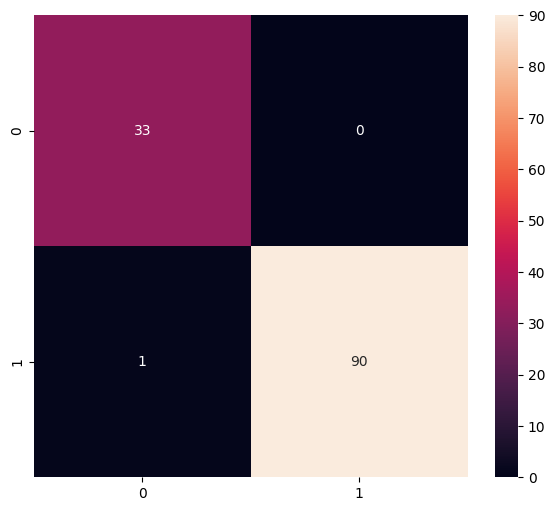

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        91

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [41]:
tflite_save_path = 'model/fsl_words_classifier/fsl_words_classifier.tflite'

In [46]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
# ✅ TensorListエラー回避のための設定
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,   # 標準TFLite演算
    tf.lite.OpsSet.SELECT_TF_OPS      # TensorFlow演算も許可
]
converter._experimental_lower_tensor_list_ops = False

# ✅ 量子化（オプション）
# LSTMを含むモデルではINT8量子化は非対応なので、Dynamic Rangeを使う
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# モデルを変換
tflite_quantized_model = converter.convert()

# 保存
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

print("✅ TFLite変換完了:", tflite_save_path)

INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmpzkt7tekb\assets


INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmpzkt7tekb\assets


Saved artifact at 'C:\Users\Dell\AppData\Local\Temp\tmpzkt7tekb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2792081642256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2792081643792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2792081644368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2792081644560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2792081645136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2792081642832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2792081645904: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ TFLite変換完了: model/fsl_words_classifier/fsl_words_classifier.tflite


# 推論テスト

In [47]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [48]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer_2:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [49]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [50]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 6 ms


In [52]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.3018893e-10 1.0000000e+00]
1
